In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             RocCurveDisplay,
                             roc_curve,
                             r2_score,
                             mean_squared_error,
                             auc, accuracy_score)
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.io.arff import loadarff 

## Pre-settings

Carrega base:

In [11]:
df_data = pd.DataFrame(loadarff('dataset_6_letter.arff')[0])
df_data['class'] = df_data['class'].astype(str).str.extract("b'([A-Z])'")

Converte coluna de classificação de categórica para numérica:

In [12]:
df_data['class'] = pd.factorize(df_data['class'])[0]

Separa colunas de features (X) e coluna de classificação (y):

In [13]:
# Features
X = df_data.iloc[:,0:-1]
# Class
y = df_data.iloc[:,-1]

Divide conjunto de treinamento  (80%) e conjunto de teste (20%):

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Configura o stratified K-fold para o cross validation:

In [15]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)

## Selecionando o melhor NB

In [16]:
names = ["GaussianNB", "BernoulliNB", "MultinomialNB"]

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB()]

count = 0

for nome, clf in zip(names, classifiers):
  model = clf
  #treinando o modelo
  model.fit(X_train, y_train)

  #predição
  y_pred = model.predict(X_test)

  #Resultados do classificador
  print(nome)
  print(classification_report(y_test, y_pred))

GaussianNB
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       147
           1       0.89      0.81      0.85       161
           2       0.30      0.24      0.27       149
           3       0.51      0.30      0.38       147
           4       0.71      0.72      0.71       155
           5       0.84      0.64      0.73       157
           6       0.58      0.65      0.61       152
           7       0.65      0.88      0.75       158
           8       0.59      0.68      0.63       161
           9       0.66      0.73      0.69       153
          10       0.84      0.90      0.87       158
          11       0.45      0.41      0.43       148
          12       0.67      0.47      0.56       154
          13       0.50      0.69      0.58       150
          14       0.63      0.59      0.61       157
          15       0.93      0.84      0.88       152
          16       0.43      0.54      0.48       157
          17    

## Melhor: GaussianNB

In [17]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
        
# performance no dataset de teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       147
           1       0.89      0.81      0.85       161
           2       0.30      0.24      0.27       149
           3       0.51      0.30      0.38       147
           4       0.71      0.72      0.71       155
           5       0.84      0.64      0.73       157
           6       0.58      0.65      0.61       152
           7       0.65      0.88      0.75       158
           8       0.59      0.68      0.63       161
           9       0.66      0.73      0.69       153
          10       0.84      0.90      0.87       158
          11       0.45      0.41      0.43       148
          12       0.67      0.47      0.56       154
          13       0.50      0.69      0.58       150
          14       0.63      0.59      0.61       157
          15       0.93      0.84      0.88       152
          16       0.43      0.54      0.48       157
          17       0.68    

## Métricas

### Matriz de confusão

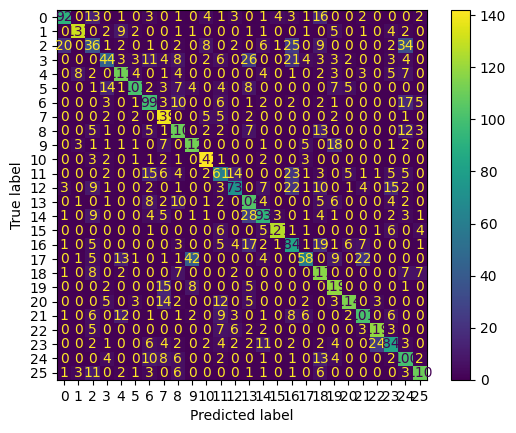

In [18]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=model.classes_),display_labels=model.classes_).plot()

### ROC

Não aplicável, pois utiliza-se 16 parâmetros.

In [20]:
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
##Área sob a curva ROC (AUC)
#roc_auc = auc(fpr, tpr)
#disp_roc_curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#                                 estimator_name=model.__class__.__name__)
#disp_roc_curve.plot()

### Erro médio quadrático

In [21]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 40.95525


### R2 Score

In [22]:
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.26720353334746605


### Accuracy Score

In [23]:
print("Accuracy score:", accuracy_score(y_test,y_pred))

Accuracy score: 0.64525
